In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class lorenz_attractor():
    def __init__(self, sigma = 10, rho = 20, beta = 8/3, time = 0.01, iteration = 10000):
        # Sigma is Prandtl number
        self.sigma = sigma
        # Rho is the Rayleigh number divided by the critical Rayleigh number        
        self.rho = rho
        # Beta is a geometric factor
        self.beta = beta
        
        # Time is a factor between each iteration of attraction
        self.time = time
        
        # Initial position of the system
        self.x = np.random.rand()
        self.y = np.random.rand()
        self.z = np.random.rand()
        
        # Define the iteration size
        self.iteration = iteration
        
    def lorenz_attr(self, x, y, z):
        x_dot = self.sigma * (y - x)
        y_dot = self.rho * x - y - x * z
        z_dot = x * y - self.beta * z
        return x_dot, y_dot, z_dot
    
    def process(self):
        x_dot, y_dot, z_dot = self.lorenz_attr(self.x, self.y, self.z)
    
        self.x = self.x + (x_dot * self.time)
        self.y = self.y + (y_dot * self.time)
        self.z = self.z + (z_dot * self.time)
        return self.x, self.y, self.z
    
    def run_simulation(self):
        xs = np.empty(self.iteration)
        ys = np.empty(self.iteration)
        zs = np.empty(self.iteration)
        
        for i in range(self.iteration):
            x, y, z = self.process()
            xs[i] = x
            ys[i] = y
            zs[i] = z
        
        return xs, ys, zs
        

In [3]:
sigma = 10
rho = 28
beta = 8/3
time = 0.01
iteration = 4096
obj = lorenz_attractor(sigma, rho, beta, time, iteration)
xs, ys, zs = obj.run_simulation()

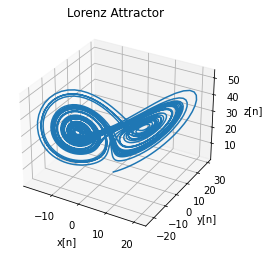

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(xs, ys, zs)
ax.set_xlabel("x[n]")
ax.set_ylabel("y[n]")
ax.set_zlabel("z[n]")
ax.set_title("Lorenz Attractor")

plt.show()